In [15]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = ''
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from encoding_information.image_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
img.max()

2991.1187

2024-02-12 20:11:25.246174: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:276] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
CUDA backend failed to initialize: FAILED_PRECONDITION: No visible GPU devices. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


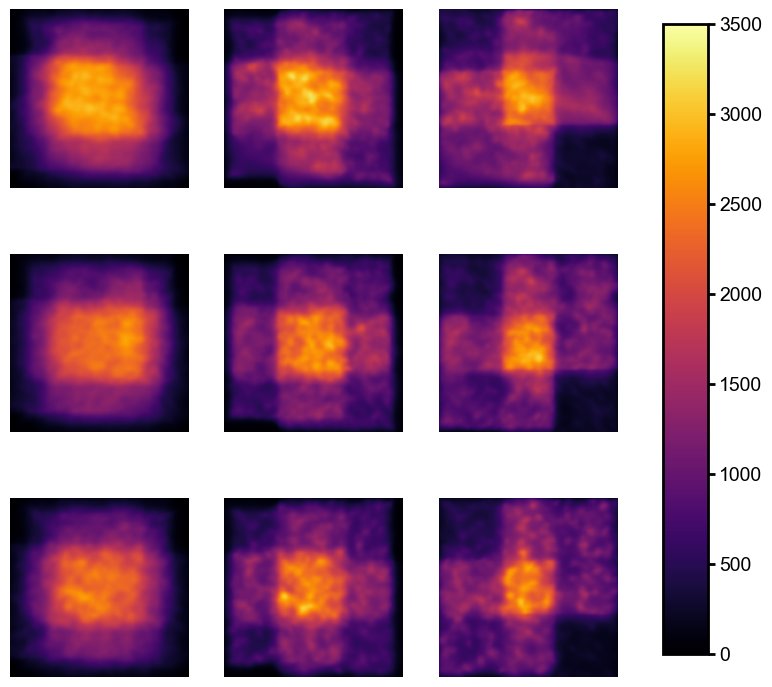

In [16]:

fig, ax = plt.subplots(3, 3, figsize=(9, 9))
vmin, vmax = 0, 3500

data = {}
for i, cp in enumerate(['checkpoint_0',  'checkpoint_300',  'checkpoint_5660']):
    path = '/home/hpinkard_waller/data/figure_3/e2e_full_volume_measurements/' + cp
    data[cp] = {}
    for j, measurement in enumerate([1, 42, 50]):
        full_path = path + '/measurement_' + str(measurement) + '.npy'
        # load data
        img = np.load(full_path)
        image = add_noise(img)
        data[cp][measurement] = img

        im = ax[j, i].imshow(img, cmap='inferno', vmin=vmin, vmax=vmax)
        ax[j, i].axis('off')

# make a colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

fig.savefig('/home/hpinkard_waller/figures/end2end/' + 'measurements' + '.pdf', transparent=True)